# 1. import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 15,5

---
# 2. import dataset

In [3]:
df = pd.read_csv('houses_to_rent.csv')
df.shape

(6080, 9)

In [4]:
df.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,0,acept,furnished,8000
1,0,64,2,1,1,10,acept,not furnished,820
2,1,443,5,5,4,3,acept,furnished,7000
3,1,73,2,2,1,12,acept,not furnished,1250
4,1,19,1,1,0,0,not acept,not furnished,1200
5,1,13,1,1,0,2,acept,not furnished,2200
6,1,55,1,1,1,2,acept,furnished,5000
7,1,55,2,2,1,2,acept,not furnished,1300
8,1,82,3,1,1,3,acept,furnished,2000
9,1,32,1,1,1,16,acept,not furnished,2900


In [5]:
df.tail(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
6070,1,200,4,5,3,2,acept,not furnished,4500
6071,0,600,5,5,4,0,acept,not furnished,5000
6072,1,200,4,4,4,21,acept,furnished,10000
6073,1,88,2,2,1,1,acept,not furnished,6000
6074,0,28,1,1,0,0,not acept,furnished,1390
6075,1,50,2,1,1,2,acept,not furnished,1150
6076,1,84,2,2,1,16,not acept,furnished,2900
6077,0,48,1,1,0,13,acept,not furnished,950
6078,1,160,3,2,2,0,not acept,not furnished,3500
6079,1,60,2,1,1,4,acept,furnished,1900


---
# 3. data prep

In [6]:
df['animal_allowed'] = np.where(df['animal']=='acept', 1, 0)
df['has_furniture'] = np.where(df['furniture']=='furnished', 1, 0)
df.shape

(6080, 11)

In [7]:
df1 = df[['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal_allowed', 'has_furniture']]
df1.shape

(6080, 8)

---
# 4. clusters
* we run a loop from 2 to 20 (step of 2)
* for each iteration we calculate the AIC and BIC for the model
* apply elbow method

In [8]:
a = []
b = []
j = []
for i in range(2,22,2):
    gm = GaussianMixture(i,random_state = 42).fit(df1)
    print('clusters :',i,'\t \t AIC :',np.round(gm.aic(df1),2),'\t \t BIC :',np.round(gm.bic(df1),2))
    
    a.append(gm.aic(df1))
    b.append(gm.bic(df1))
    j.append(i)

clusters : 2 	 	 AIC : 180525.07 	 	 BIC : 181122.5
clusters : 4 	 	 AIC : 168267.62 	 	 BIC : 169469.2
clusters : 6 	 	 AIC : 38336.21 	 	 BIC : 40141.94
clusters : 8 	 	 AIC : 556.4 	 	 BIC : 2966.28
clusters : 10 	 	 AIC : 25466.72 	 	 BIC : 28480.75
clusters : 12 	 	 AIC : 3810.69 	 	 BIC : 7428.87
clusters : 14 	 	 AIC : -1009.91 	 	 BIC : 3212.42
clusters : 16 	 	 AIC : -34040.4 	 	 BIC : -29213.93
clusters : 18 	 	 AIC : -43744.13 	 	 BIC : -38313.51
clusters : 20 	 	 AIC : -30793.2 	 	 BIC : -24758.43


---
# 5. plot

In [9]:
df2 = pd.DataFrame([j,a,b]).transpose()
df2.columns = ['clusters', 'aic', 'bic']
df2 = np.round(df2,0)

Text(0.5, 0, 'number of components')

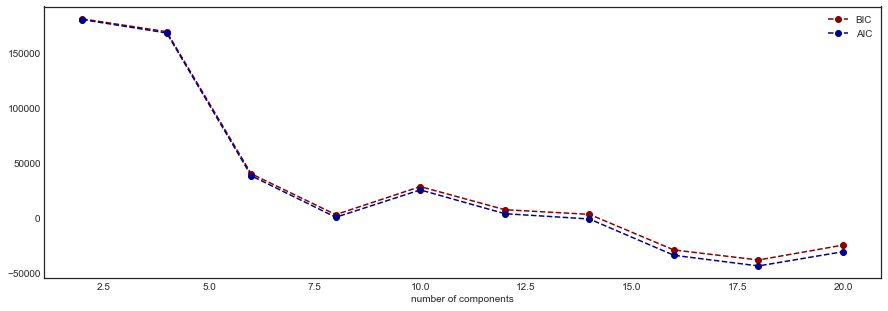

In [10]:
plt.plot(j, b, linestyle='--', marker='o', color='darkred',label = 'BIC')
plt.plot(j, a, linestyle='--', marker='o', color='darkblue',label = 'AIC')
plt.legend(loc = 'best')
plt.xlabel('number of components')

---
# 6. model

In [11]:
gb = GaussianMixture(n_components= 6, random_state = 42).fit(df1)
gbi = np.round(pd.DataFrame(gb.means_,columns = list(df1.columns)),2)
gbi

,city,area,rooms,bathroom,parking spaces,floor,animal_allowed,has_furniture
0,1.0,67.54,1.87,1.45,0.92,6.54,1.0,0.25
1,1.0,24606.00,5.00,4.00,4.00,12.00,1.0,0.00
2,0.0,128.70,2.39,2.02,1.63,4.49,0.8,0.14
3,0.0,12732.00,3.00,2.00,0.00,3.00,1.0,0.00
4,1.0,240.82,3.32,3.47,2.81,5.09,1.0,0.27
5,1.0,107.82,2.07,1.97,1.29,6.15,0.0,0.34


---
# 7. probabilities

In [12]:
prob = round(pd.DataFrame(gb.predict_proba(df1)),3)
df2 = pd.concat([df1, prob], axis = 1)
df2.shape

(6080, 14)

In [13]:
df2.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal_allowed,has_furniture,0,1,2,3,4,5
0,1,240,3,3,4,0,1,1,0.000,0.0,0.0,0.0,1.000,0.0
1,0,64,2,1,1,10,1,0,0.000,0.0,1.0,0.0,0.000,0.0
2,1,443,5,5,4,3,1,1,0.000,0.0,0.0,0.0,1.000,0.0
3,1,73,2,2,1,12,1,0,0.990,0.0,0.0,0.0,0.010,0.0
4,1,19,1,1,0,0,0,0,0.000,0.0,0.0,0.0,0.000,1.0
5,1,13,1,1,0,2,1,0,0.993,0.0,0.0,0.0,0.007,0.0
6,1,55,1,1,1,2,1,1,0.998,0.0,0.0,0.0,0.002,0.0
7,1,55,2,2,1,2,1,0,0.960,0.0,0.0,0.0,0.040,0.0
8,1,82,3,1,1,3,1,1,0.853,0.0,0.0,0.0,0.147,0.0
9,1,32,1,1,1,16,1,0,0.998,0.0,0.0,0.0,0.002,0.0


In [14]:
df2.tail(10)

,city,area,rooms,bathroom,parking spaces,floor,animal_allowed,has_furniture,0,1,2,3,4,5
6070,1,200,4,5,3,2,1,0,0.000,0.0,0.0,0.0,1.000,0.0
6071,0,600,5,5,4,0,1,0,0.000,0.0,1.0,0.0,0.000,0.0
6072,1,200,4,4,4,21,1,1,0.000,0.0,0.0,0.0,1.000,0.0
6073,1,88,2,2,1,1,1,0,0.982,0.0,0.0,0.0,0.018,0.0
6074,0,28,1,1,0,0,0,1,0.000,0.0,1.0,0.0,0.000,0.0
6075,1,50,2,1,1,2,1,0,0.987,0.0,0.0,0.0,0.013,0.0
6076,1,84,2,2,1,16,0,1,0.000,0.0,0.0,0.0,0.000,1.0
6077,0,48,1,1,0,13,1,0,0.000,0.0,1.0,0.0,0.000,0.0
6078,1,160,3,2,2,0,0,0,0.000,0.0,0.0,0.0,0.000,1.0
6079,1,60,2,1,1,4,1,1,0.991,0.0,0.0,0.0,0.009,0.0
